In [0]:
#Fetching the data from source URL
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/cache/epub/33355/pg33355.txt","/tmp/harika.txt")
dbutils.fs.mv("file:/tmp/harika.txt","dbfs:/data/harika.txt")

Out[3]: True

In [0]:
sc_RDD = sc.textFile("dbfs:/data/harika.txt")

In [0]:
# flatamp each line to words
wordsRDD = sc_RDD.flatMap(lambda line:line.lower().strip().split(" "))

In [0]:
import re
# remove punctutation
clean_tokens_RDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))

In [0]:
#prepare to clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopwords = remove.getStopWords()
clean_words_RDD=clean_tokens_RDD.filter(lambda wrds: wrds not in stopwords)
# removing all the empty spaces from the data
RemoveSpaceRDD = clean_words_RDD.filter(lambda x: x != "")

In [0]:
# map() to intermediate key-value pairs

IKVPairsRDD = RemoveSpaceRDD.map(lambda word : (word,1) )


In [0]:


# reduceByKey() to get (word, count) results
resultsRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)


In [0]:
mostused_results = resultsRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(20)
print(mostused_results)


[(103, 'park'), (94, 'beach'), (87, 'project'), (77, 'illustration'), (56, 'gutenbergtm'), (48, 'work'), (47, 'honolulu'), (42, 'waikiki'), (36, 'center'), (36, 'hi'), (34, 'hawaiian'), (33, 'oahu'), (33, 'works'), (30, 'gutenberg'), (29, 'free'), (29, 'fee'), (27, 'electronic'), (25, 'hawaii'), (22, 'foundation'), (22, 'e')]

In [0]:
results=resultsRDD.collect()


In [0]:
print(results)

[('project', 87), ('gutenberg', 30), ('ebook', 11), ('oahu', 33), ('travelers', 6), ('guide', 6), ('use', 14), ('anyone', 5), ('anywhere', 4), ('restrictions', 3), ('whatsoever', 2), ('may', 21), ('give', 5), ('away', 3), ('reuse', 2), ('online', 6), ('title', 1), ('language', 1), ('start', 3), ('produced', 3), ('mark', 3), ('c', 7), ('orton', 2), ('team', 2), ('httpwwwpgdpnet', 2), ('loveliest', 1), ('fleet', 1), ('islands', 10), ('anchored', 1), ('ocean', 6), ('twain', 1), ('contents', 2), ('bus', 9), ('hawaiian', 34), ('waikiki', 42), ('oahus', 12), ('east', 9), ('end', 11), ('koko', 12), ('head', 19), ('sea', 18), ('windward', 5), ('coast', 6), ('nuuanu', 7), ('center', 36), ('sunset', 6), ('beach', 94), ('waimea', 6), ('falls', 9), ('central', 4), ('flowers', 5), ('surfing', 12), ('swimming', 6), ('snorkeling', 5), ('glass', 5), ('camping', 7), ('weather', 4), ('past', 4), ('sugar', 20), ('pineapple', 20), ('detail', 6), ('maps', 2), ('p', 3), ('color', 1), ('printing', 1), ('co', 2), ('inc', 1), ('fl', 1), ('ai', 1), ('road', 12), ('taipei', 1), ('taiwan', 1), ('definitely', 1), ('best', 6), ('go', 3), ('around', 9), ('school', 1), ('ride', 3), ('like', 2), ('take', 13), ('four', 3), ('trip', 4), ('board', 5), ('requesting', 1), ('kaneohewahiawa', 1), ('circle', 2), ('different', 3), ('directions', 3), ('entire', 2), ('pay', 2), ('change', 4), ('make', 5), ('luggage', 1), ('large', 3), ('buses', 3), ('full', 15), ('run', 1), ('three', 5), ('minutes', 2), ('toward', 3), ('kuhio', 3), ('ave', 19), ('ask', 3), ('geographical', 1), ('makaitoward', 2), ('maukatoward', 2), ('mountains', 6), ('ewathe', 1), ('direction', 1), ('sightseeing', 1), ('destinations', 1), ('call', 6), ('kings', 4), ('alley', 2), ('alohahello', 1), ('farewell', 1), ('love', 1), ('da', 2), ('kinemeans', 1), ('positive', 1), ('halehouse', 1), ('hanawork', 1), ('heiauancient', 1), ('holokuformal', 1), ('dress', 2), ('kamaainaa', 1), ('person', 5), ('lived', 2), ('long', 6), ('kaneman', 1), ('kapuforbidden', 1), ('laulaupork', 1), ('beef', 1), ('leaves', 3), ('mahalothank', 1), ('malihinistranger', 1), ('muumuuloose', 1), ('opustomach', 1), ('palicliff', 1), ('puaflower', 1), ('root', 1), ('pukahole', 1), ('doeuvres', 1), ('wikiwikihurry', 1), ('king', 9), ('statue', 3), ('statueking', 1), ('palace', 10), ('impressive', 1), ('bronze', 1), ('draped', 1), ('forty', 1), ('flower', 2), ('leis', 2), ('june', 1), ('richards', 1), ('soil', 1), ('queen', 8), ('months', 2), ('house', 6), ('attempt', 1), ('overthrown', 1), ('monarchy', 3), ('wedsat', 1), ('free', 29), ('friday', 2), ('noon', 2), ('band', 2), ('state', 16), ('buildingmauka', 1), ('volcanoshaped', 1), ('allowing', 1), ('rain', 2), ('fall', 1), ('near', 5), ('courtyard', 1), ('library', 3), ('exhibits', 8), ('open', 9), ('patio', 1), ('excellent', 7), ('hawaiianpacific', 1), ('room', 2), ('hale', 3), ('hallking', 1), ('streets', 4), ('mission', 6), ('homes', 3), ('buildings', 1), ('provide', 8), ('insight', 1), ('oldest', 2), ('frame', 2), ('precut', 1), ('lumber', 1), ('tuessun', 1), ('fee', 29), ('kahilis', 1), ('altar', 1), ('service', 2), ('artscorner', 1), ('ward', 3), ('beretania', 2), ('eastern', 2), ('museums', 1), ('world', 15), ('series', 2), ('exhibition', 1), ('garden', 11), ('courtyards', 1), ('monday', 5), ('sun', 5), ('centerbetween', 1), ('sports', 2), ('arena', 1), ('conventiontheatre', 1), ('carpfilled', 1), ('always', 1), ('something', 1), ('broadway', 1), ('aloha', 4), ('towerat', 1), ('pier', 2), ('waterfront', 2), ('views', 1), ('clydepier', 1), ('ninetyfive', 1), ('year', 5), ('floating', 2), ('maritime', 2), ('museum', 11), ('kind', 2), ('nearby', 2), ('chinese', 6), ('restaurant', 2), ('towed', 1), ('way', 6), ('kong', 1), ('chinatowninteresting', 1), ('businesses', 1), ('herb', 1), ('clinics', 1), ('tuesday', 1), ('tour', 10), ('commerce', 2), ('ends', 1), ('fats', 1), ('optional', 1), ('maunakea', 1), ('sts', 1), ('multiethnic', 1), ('mausoleum', 1), ('acres', 4), ('sacred', 2

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [0]:
# prepare chart information
source = 'Oahu Travelers guide,by Bill Gleasner,Diana Gleasner'
title = 'Top Words in ' + source
xlabel = 'word'
ylabel = 'count'

In [0]:
# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(mostused_results, columns =[xlabel, ylabel]) 
print(df)

word count
0 103 park
1 94 beach
2 87 project
3 77 illustration
4 56 gutenbergtm
5 48 work
6 47 honolulu
7 42 waikiki
8 36 center
9 36 hi
10 34 hawaiian
11 33 oahu
12 33 works
13 30 gutenberg
14 29 free
15 29 fee
16 27 electronic
17 25 hawaii
18 22 foundation
19 22 e

Out[16]:

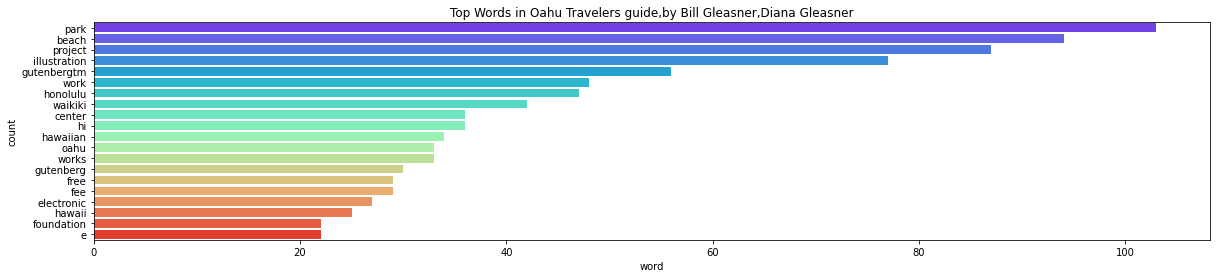

Text(0.5, 1.0, 'Top Words in Oahu Travelers guide,by Bill Gleasner,Diana Gleasner')

In [0]:
# create plot (using matplotlib)
plt.figure(figsize=(20,4))
sns.barplot(xlabel, ylabel, data=df, palette="rainbow").set_title(title)

In [0]:
pip install nltk

Python interpreter will be restarted.
Requirement already satisfied: nltk in /local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/lib/python3.8/site-packages (3.6.2)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: tqdm in /local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/lib/python3.8/site-packages (from nltk) (4.60.0)
Requirement already satisfied: regex in /local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/lib/python3.8/site-packages (from nltk) (2021.4.4)
Requirement already satisfied: click in /local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/lib/python3.8/site-packages (from nltk) (7.1.2)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-acc51b9f-415a-4e38-a52b-6bb10659db7e/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Package gazetteers is already up-to-date!
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Package genesis is already up-to-date!
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Package gutenberg is already up-to-date!
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Package inaugural is already up-to-date!
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package movie_reviews is already up-to-date!
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Package names is already up-to-date!
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Package shakespeare is already up-to-date!
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Package stopwords is already up-to-date!
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Package treebank is already up-to-date!
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package twitter_samples is already up-to-date!
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Package omw is already up-to-date!
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Package wordnet is already up-to-date!
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Package wordnet_ic is already up-to-date!
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Package words is already up-to-date!
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package maxent_ne_chunker is already up-to-date!
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Package punkt is already up-to-date!
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package snowball_data is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | 
[nltk_data] Done downloading collection popular

 Preprocessed Data: ﻿the project gutenberg ebook oahu traveler 's guide , bill gleasner diana gleasner ebook use anyone anywhere cost almost restrictions whatsoever may copy , give away re-use terms project gutenberg license included ebook online www gutenberg org title : oahu traveler 's guide author : bill gleasner diana gleasner release date : august 5 , 2010 [ ebook # 33355 ] language : english * * * start project gutenberg ebook oahu traveler 's guide * * * produced mark c orton , ernest schaal online distributed proofreading team http : //www pgdp net [ illustration : hawaii `` loveliest fleet islands lies anchored ocean `` mark twain ] paradise park [ illustration ] oahu traveler 's guide bill diana gleasner table contents 4 bus 6 hawaiian words phrases 8 honolulu highlights 16 waikiki 22 oahu 's east end ( koko head , sea life park ) 25 oahu 's windward coast ( nuuanu pali lookout , polynesian cultural center ) 30 oahu 's north shore ( sunset beach , waimea falls park ) 31 central oahu ( schofield barracks , wahiawa ) 32 beachcombing 33 hawaiian fruits 34 hawaiian flowers 39 surfing 40 swimming beaches 41 body surfing snorkeling beaches 42 glass float beachcombing 43 fishing 44 fun kids 47 tennis 48 golf 49 camping 50 hiking 51 weather 52 oahu 's past 53 sugar pineapple 54 pineapple 56 map oahu 58 detail map waikiki 60 detail map honolulu 62 detail maps oahu 's north shore east end 63 detail map windward oahu 64 detail map o

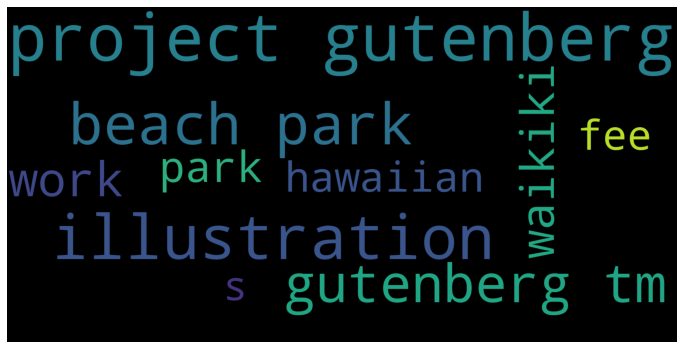

In [0]:
import wordcloud
import nltk
nltk.download('popular')
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_words=10, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
import urllib.request
url = "https://www.gutenberg.org/cache/epub/33355/pg33355.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')

input_text1 = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text1)
wordcloud_generator.create_word_cloud(clean_data)